# Tugas Eksplorasi Pemrograman 1
Mata Kuliah: Perolehan Informasi

Author: Adrianus Saga Ekakristi, Gibran Brahmanta

Dalam tugas ini, anda akan mempelajari *text preprocessing* yang umum dilakukan sebagai langkah awal dalam sistem Information Retrieval. Terdapat 4 proses utama yang akan dibahas, yaitu *tokenization*, *lemmatization*, *stemming*, dan *stop words removal*.

Notebook ini terdiri dari 2 bagian. Pertama, anda akan diberikan contoh code *text preprocessing* yang diterapkan untuk data dalam bahasa Indonesia. Pada bagian kedua, anda akan diminta untuk menulis code untuk melakukan pemrosesan serupa untuk data dalam bahasa Inggris.

Selamat mengerjakan dan semoga bermanfaat!

## Bagian 1: Text Preprocessing untuk Bahasa Indonesia

Bagian ini akan membahas mengenai contoh pemrosesan teks bahasa Indonesia. Silahkan pelajari dan coba pahami code-code dibawah ini.

In [ ]:
import time
start_time_id: int = time.time()
! date

Wed Sep 13 03:36:18 AM UTC 2023


### Preparasi, Instalasi Packages, Download Resources

Beberapa packages perlu diinstall terlebih dahulu, seperti:
- dataset (Hugginface Dataset)
- PySastrasi (Implementasi Python untuk Sastrawi)
- package-package lainnya sesuai kebutuhan

In [ ]:
!pip install datasets==2.10.1 PySastrawi==1.2.0 stanza==1.5.0

from typing import List, Dict, Any, Set, Tuple
from tqdm import tqdm

import json
import multiprocessing
import re

import stanza
stanza.download('id', processors = 'tokenize,mwt,pos,lemma')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.5/802.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 12.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 7.8 MB/s eta 0:00:00


INFO:stanza:Downloading these customized packages for language: id (Indonesian)...
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| pretrain  | conll17 |



INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


### Load Data

Untuk contoh ini, akan digunakan data corpus Indonesian mC4 (Colossal Clean Crawled Corpus, Raffel et al., 2019), yaitu kumpulan hasil crawling web oleh Common Crawl yang sudah dibersihkan oleh Raffel et al., 2019 serta Allen AI, dan kemudian dilakukan filter untuk bahasa Indonesia.

Load data dilakukan dengan memanfaatkan library HuggingFace Dataset. Beberapa parameter penting:
- path = 'indonesian-nlp/mc4-id': merujuk ke https://huggingface.co/datasets/indonesian-nlp/mc4-id
- name = 'tiny': config untuk melakukan loading data dalam jumlah tertentu (tiny)
- split = 'X[:N%]': ambil N% split X data dari dataset yang telah diunduh (e.g. train[:5%])
- num_proc: melakukan penarikan data secara parallel dengan jumlah process sebanyak nilai yang digunakan dalam parameternya

Referensi:
- https://huggingface.co/docs/datasets/loading
- https://huggingface.co/docs/datasets/main/en/package_reference/loading_methods#datasets.load_dataset

In [ ]:
from datasets import load_dataset, Dataset, DatasetDict
dataset_id: Dataset = load_dataset(
    'indonesian-nlp/mc4-id',
    'tiny',
    split = 'validation[:5%]',
    num_proc = (8 * multiprocessing.cpu_count()),
)

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset mc4-id downloaded and prepared to /root/.cache/huggingface/datasets/indonesian-nlp___mc4-id/tiny/1.0.0/721475d1d1a512521de99189896104190f5ef3c5dbbdd511442097b116178061. Subsequent calls will reuse this data.


Setelah data selesai ditarik sebagai variable `dataset_id`, kita dapat melihat lebih detail dataset ini beserta dengan sample salah satu row.

In [ ]:
print(f"dataset variable data type: {type(dataset_id)}")
print(f"dataset: {dataset_id}")
print(f"dataset sample: {json.dumps(dataset_id[0], indent = 2)}")

dataset variable data type: <class 'datasets.arrow_dataset.Dataset'>
dataset: Dataset({
    features: ['text', 'timestamp', 'url'],
    num_rows: 803
})
dataset sample: {
  "text": "03 Desember 2018, 11: 55: 59 WIB | editor : Perdana\nPERAWATAN naskah kuno berusia ratusan tahun koleksi Rekso Pustoko memerlukan biaya tak sedikit biaya. Dirinya tak menyangkal bahwa perawatan untuk buku-buku berusia sekitar 200 tahun itu terbilang kurang. Besarnya biaya perawatan masih menjadi alasan utama sebagian besar koleksi belum tersentuh perawatan layaknya naskah dan manuskrip kuno di museum-museum atau perpustakaan besar lainnya.\nSalah satu perawatan yang masih belum baik adalah fumigasi. Hingga saat ini, perawatan untuk membunuh biota yang merusak arsip hanya bisa dilakukan setahun sekali untuk satu ruang. Idealnya fumigasi dilakukan dua kali dalam setahun.\nSelain fumigasi, untuk menjaga ketahanan kertas agar tidak dimakan ngengat bisa dilakukan dengan melakukan enkapsulasi dan alih media. Biay

Dapat dilihat bahwa terdapat beberapa kolom/field (title, text, domain, dsb) dalam dataset ini. Dalam contoh ini, kita hanya memerlukan kolom text. Untuk membuang kolom lain, dapat digunakan function remove_columns.

In [ ]:
dataset_id = dataset_id.remove_columns(["timestamp", "url"])
print(f"dataset: {dataset_id}")

dataset: Dataset({
    features: ['text'],
    num_rows: 803
})


Untuk keperluan ilustrasi input dan output dari masing-masing langkah nantinya, kita dapat mengambil salah satu konten artikel dari dataset.

In [ ]:
example_passage_id: str = dataset_id[0]['text']
print(f"example passage: {example_passage_id}")

example passage: 03 Desember 2018, 11: 55: 59 WIB | editor : Perdana
PERAWATAN naskah kuno berusia ratusan tahun koleksi Rekso Pustoko memerlukan biaya tak sedikit biaya. Dirinya tak menyangkal bahwa perawatan untuk buku-buku berusia sekitar 200 tahun itu terbilang kurang. Besarnya biaya perawatan masih menjadi alasan utama sebagian besar koleksi belum tersentuh perawatan layaknya naskah dan manuskrip kuno di museum-museum atau perpustakaan besar lainnya.
Salah satu perawatan yang masih belum baik adalah fumigasi. Hingga saat ini, perawatan untuk membunuh biota yang merusak arsip hanya bisa dilakukan setahun sekali untuk satu ruang. Idealnya fumigasi dilakukan dua kali dalam setahun.
Selain fumigasi, untuk menjaga ketahanan kertas agar tidak dimakan ngengat bisa dilakukan dengan melakukan enkapsulasi dan alih media. Biaya enkapsulasi sendiri cukup besar. Satu lembar enkapsulasi dihargai sebesar Rp 20 ribu. Dalam sebulan ekapsulasi bisa dilakukan pada 1.000 lembar manuskrip sehingga bia

### 1.1: Tokenization

Tokenisasi merupakan proses mengubah teks (input) menjadi serangkaian token (output). Token adalah komponen terkecil dari teks, seperti kata, tanda baca, dan angka, dan berbagai variasi lainnya.

Terdapat berbagai cara untuk melakukan tokenisasi, mulai dari penggunaan spasi sebagai delimiter, regular expression (regex), hingga metode berbasis machine learning. Dalam contoh ini, kita akan menggunakan regex untuk melakukan tokenisasi.

Referensi:
- https://docs.python.org/3/howto/regex.html

In [ ]:
# Tokenize
tokenizer_pattern: str = r'\w+'
def tokenize_text_id(text: str, tokenizer_pattern: str) -> List[str]:
  tokens: List[str] = re.findall(tokenizer_pattern, text)
  return tokens

example_tokens: List[str] = tokenize_text_id(
  text = example_passage_id,
  tokenizer_pattern = tokenizer_pattern,
)
print(f"example of tokenized text: {example_tokens}")

example of tokenized text: ['03', 'Desember', '2018', '11', '55', '59', 'WIB', 'editor', 'Perdana', 'PERAWATAN', 'naskah', 'kuno', 'berusia', 'ratusan', 'tahun', 'koleksi', 'Rekso', 'Pustoko', 'memerlukan', 'biaya', 'tak', 'sedikit', 'biaya', 'Dirinya', 'tak', 'menyangkal', 'bahwa', 'perawatan', 'untuk', 'buku', 'buku', 'berusia', 'sekitar', '200', 'tahun', 'itu', 'terbilang', 'kurang', 'Besarnya', 'biaya', 'perawatan', 'masih', 'menjadi', 'alasan', 'utama', 'sebagian', 'besar', 'koleksi', 'belum', 'tersentuh', 'perawatan', 'layaknya', 'naskah', 'dan', 'manuskrip', 'kuno', 'di', 'museum', 'museum', 'atau', 'perpustakaan', 'besar', 'lainnya', 'Salah', 'satu', 'perawatan', 'yang', 'masih', 'belum', 'baik', 'adalah', 'fumigasi', 'Hingga', 'saat', 'ini', 'perawatan', 'untuk', 'membunuh', 'biota', 'yang', 'merusak', 'arsip', 'hanya', 'bisa', 'dilakukan', 'setahun', 'sekali', 'untuk', 'satu', 'ruang', 'Idealnya', 'fumigasi', 'dilakukan', 'dua', 'kali', 'dalam', 'setahun', 'Selain', 'fumigasi

### 1.2: Lemmatization

Lematisasi merupakan proses untuk mencari bentuk paling dasar dari suatu token dengan memanfaatkan dictionary / mapping dari varian kata (inflected form) menjadi bentuk dasar yang disebut lemma.

Contoh bahasa Indonesia: "menyapu", "disapu", "tersapu" -> "sapu"

Contoh bahasa Inggris: "studies", "studying" -> "study"

Dalam contoh code ini, akan digunakan library [Stanza](https://stanfordnlp.github.io/stanza/), sebuah library natural language processing (NLP) dari Stanford University NLP Group.

Referensi:
- https://stanfordnlp.github.io/stanza/lemma.html
- https://stanfordnlp.github.io/stanza/tokenize.html#start-with-pretokenized-text

In [ ]:
# Lemmatize
from stanza.models.common.doc import Document
from stanza.pipeline.core import Pipeline
nlp_stanza: Pipeline = stanza.Pipeline(
  'id',
  processors = 'tokenize,mwt,lemma',
  tokenize_pretokenized = True,
)

def lemmatize_tokens_id(tokens: List[str], nlp_stanza: Pipeline) -> List[str]:
  doc: Document = nlp_stanza([tokens])

  tokens_lemmatized: List[str] = [
    word.lemma for sent in doc.sentences for word in sent.words
  ]
  tokens_lemmatized_without_empty_string: List[str] = [
    token
    for token in tokens_lemmatized
    if (token != None) and (token != '')
  ]

  return tokens_lemmatized_without_empty_string

example_tokens_lemmatized: List[str] = lemmatize_tokens_id(
  tokens = example_tokens,
  nlp_stanza = nlp_stanza,
)
print(f"example of tokens before lemmatization: {example_tokens}")
print(f"example of tokens after lemmatization:  {example_tokens_lemmatized}")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| lemma     | gsd     |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


example of tokens before lemmatization: ['03', 'Desember', '2018', '11', '55', '59', 'WIB', 'editor', 'Perdana', 'PERAWATAN', 'naskah', 'kuno', 'berusia', 'ratusan', 'tahun', 'koleksi', 'Rekso', 'Pustoko', 'memerlukan', 'biaya', 'tak', 'sedikit', 'biaya', 'Dirinya', 'tak', 'menyangkal', 'bahwa', 'perawatan', 'untuk', 'buku', 'buku', 'berusia', 'sekitar', '200', 'tahun', 'itu', 'terbilang', 'kurang', 'Besarnya', 'biaya', 'perawatan', 'masih', 'menjadi', 'alasan', 'utama', 'sebagian', 'besar', 'koleksi', 'belum', 'tersentuh', 'perawatan', 'layaknya', 'naskah', 'dan', 'manuskrip', 'kuno', 'di', 'museum', 'museum', 'atau', 'perpustakaan', 'besar', 'lainnya', 'Salah', 'satu', 'perawatan', 'yang', 'masih', 'belum', 'baik', 'adalah', 'fumigasi', 'Hingga', 'saat', 'ini', 'perawatan', 'untuk', 'membunuh', 'biota', 'yang', 'merusak', 'arsip', 'hanya', 'bisa', 'dilakukan', 'setahun', 'sekali', 'untuk', 'satu', 'ruang', 'Idealnya', 'fumigasi', 'dilakukan', 'dua', 'kali', 'dalam', 'setahun', 'Selai

### 1.3: Stemming

Stemming, mirip dengan lematisasi, merupakan aktivitas transformasi kata dari bentuk varian atau *inflected* menjadi bentuk dasar. Bedanya, stemming menggunakan metode algorithmic, yaitu sekumpulan rules untuk memotong karakter (imbuhan) dalam token hingga mencapai bentuk dasar yang disebut stem.

Contoh Bahasa Indonesia: "memakan", "dimakan", "termakan" -> "makan"

Contoh Bahasa Inggris: "wait", "waiting", "waits" -> "wait"

Dalam contoh ini, stemming dilakukan menggunakan tools dari [PySastrawi](https://github.com/har07/PySastrawi).

In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.Stemmer.CachedStemmer import CachedStemmer
factory: StemmerFactory = StemmerFactory()
stemmer: CachedStemmer = factory.create_stemmer()

def stem_tokens_id(tokens: List[str], stemmer: CachedStemmer) -> List[str]:
  stemmed_tokens: List[str] = [
      stemmer.stem(token) if token else ''
      for token in tokens
  ]
  stemmed_tokens_without_empty_string: List[str] = [
      token
      for token in stemmed_tokens
      if not ((token == '') or (token == None))
  ]
  return stemmed_tokens_without_empty_string

example_tokens_after_stemming: List[str] = stem_tokens_id(
  tokens = example_tokens_lemmatized,
  stemmer = stemmer,
)
print(f"example of tokens before stemming: {example_tokens_lemmatized}")
print(f"example of tokens after stemming:  {example_tokens_after_stemming}")

example of tokens before stemming: ['03', 'desember', '2018', '11', '55', '59', 'wib', 'editor', 'perdana', 'rawat', 'naskah', 'kuno', 'usia', 'ratus', 'tahun', 'koleksi', 'rekso', 'pustoko', 'perlu', 'biaya', 'tak', 'sedikit', 'biaya', 'dirinya', 'tak', 'sangkal', 'bahwa', 'rawat', 'untuk', 'buku', 'buku', 'usia', 'sekitar', '200', 'tahun', 'itu', 'bilang', 'kurang', 'besar', 'biaya', 'rawat', 'masih', 'jadi', 'alasan', 'utama', 'sebagian', 'besar', 'koleksi', 'belum', 'tersentuh', 'rawat', 'layak', 'naskah', 'dan', 'manuskrip', 'kuno', 'di', 'museum', 'museum', 'atau', 'perpustakaan', 'besar', 'lainnya', 'salah', 'satu', 'rawat', 'yang', 'masih', 'belum', 'baik', 'adalah', 'fumigasi', 'hingga', 'saat', 'ini', 'rawat', 'untuk', 'bunuh', 'biota', 'yang', 'rusak', 'arsip', 'hanya', 'bisa', 'laku', 'setahun', 'sekali', 'untuk', 'satu', 'ruang', 'idealnya', 'fumigasi', 'laku', 'dua', 'kali', 'dalam', 'setahun', 'selain', 'fumigasi', 'untuk', 'jaga', 'tahan', 'kertas', 'agar', 'tidak', 'di

### 1.4: Stop Words Removal

Stop word merupakan kata-kata yang pada umumnya memiliki frekuensi yang sangat tinggi dalam teks namun tidak memberikan informasi yang signifikan.

Contoh stop words bahasa Indonesia: "yang", "di", "pada"

Cotoh stop words bahasa Inggris: "of", "in", "on"

Dalam contoh berikut, kita bisa mendapatkan kumpulan stop words dari tools PySastrawi dan mengunakannya untuk membersihkan token-token yang akan diproses.

In [ ]:
# Stop Words Removal
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
stop_words_list: List[str] = stop_factory.get_stop_words()
stop_words_set: Set[str] = set(stop_words_list)

def remove_stop_words_id(tokens: List[str], stop_words: Dict[str, Any]) -> List[str]:
  tokens_without_stop_words: List[str] = [
      token
      for token in tokens
      if token not in stop_words
  ]
  return tokens_without_stop_words

example_tokens_without_stop_words: List[str] = remove_stop_words_id(
  tokens = example_tokens_after_stemming,
  stop_words = stop_words_set,
)

print(f"stop words from PySastrawi: {stop_words_set}\n")
print(f"example of tokens with stop words (before):   {example_tokens_after_stemming}")
print(f"example of tokens without stop words (after): {example_tokens_without_stop_words}")

stop words from PySastrawi: {'sementara', 'tersebutlah', 'dipertanyakan', 'dirinya', 'lima', 'hal', 'lalu', 'olehnya', 'berlainan', 'menaiki', 'mengatakan', 'daripada', 'seluruhnya', 'misalkan', 'sebenarnya', 'j', 'kinilah', 'seperti', 'sesampai', 'sajalah', 'sebesar', 'sama-sama', 'mengatakannya', 'berakhirnya', 'cukuplah', 'ataupun', 'kemudian', 'mirip', 'baik', 'diperbuat', 'tandasnya', 'ditanyai', 'diibaratkannya', 'entahlah', 'kelima', 'apatah', 'dijawab', 'hampir', 'yaitu', 'dari', 'padanya', 'merekalah', 'karenanya', 'ibarat', 'ucapnya', 'dong', 'malahan', 'perlukah', 'menanyai', 'dituturkannya', 'kelamaan', 'nyata', 'demi', 'sangatlah', 'awal', 'bersiap', 'inginkan', 'selain', 'dimintai', 'segala', 'katanya', 'banyak', 'kasus', 'sekitar', 'mula', 'sekadarnya', 'berakhir', 'diminta', 'rasanya', 'tiba', 'kira', 'begini', 'diantara', 'hendaknya', 'mata', 'antara', 'mulai', 'semua', 'berbagai', 'sejenak', 'segera', 'diingat', 'semisalnya', 'v', 'bermula', 'ini', 'memerlukan', 'menu

### 1.5: Preprocess Data

Function-function diatas (tokenisasi, lematisasi, *stemming*, *stop words removal*) dapat dirangkai untuk diterapkan terhadap seluruh data dalam dataset.

In [ ]:
# Define your preprocessing pipeline as a function
def preprocess_text_into_tokens_id(text: str,
                                   tokenizer_pattern: str,
                                   nlp_stanza,
                                   stemmer: CachedStemmer,
                                   stop_words: Dict[str, Any]) -> List[str]:
  tokens: List[str] = tokenize_text_id(
    text = text,
    tokenizer_pattern = tokenizer_pattern,
  )
  tokens: List[str] = lemmatize_tokens_id(
    tokens = tokens,
    nlp_stanza = nlp_stanza,
  )
  tokens: List[str] = stem_tokens_id(
    tokens = tokens,
    stemmer = stemmer,
  )
  tokens: List[str] = remove_stop_words_id(
    tokens = tokens,
    stop_words = stop_words,
  )
  return tokens

Untuk menerapkan pipeline pemrosesan teks tersebut kepada seluruh artikel dalam dataset, kita dapat memanfaatkan built-in function map() dalam HuggingFace dataset.

In [ ]:
# Apply preprocess to all data
dataset_preprocessed_id: Dataset = dataset_id.map(
  lambda row: dict(
    tokens = preprocess_text_into_tokens_id(
      text = row['text'],
      tokenizer_pattern = tokenizer_pattern,
      nlp_stanza = nlp_stanza,
      stemmer = stemmer,
      stop_words = stop_words_set,
    ),
  ),
  remove_columns = ['text'],
)
print(f"preprocessed dataset: {dataset_preprocessed_id}")


Map:   0%|          | 0/803 [00:00<?, ? examples/s]

preprocessed dataset: Dataset({
    features: ['tokens'],
    num_rows: 803
})


Hasil akhir dari penerapan tersebut adalah data (tokens) yang siap digunakan untuk pemrosesan selanjutnya dalam aplikasi IR.

In [ ]:
print(f"sample of original text (before): {dataset_id[0]['text']}")
print('------')
print(f"sample of preprocessed tokens (after): {dataset_preprocessed_id[0]['tokens']}")

sample of original text (before): 03 Desember 2018, 11: 55: 59 WIB | editor : Perdana
PERAWATAN naskah kuno berusia ratusan tahun koleksi Rekso Pustoko memerlukan biaya tak sedikit biaya. Dirinya tak menyangkal bahwa perawatan untuk buku-buku berusia sekitar 200 tahun itu terbilang kurang. Besarnya biaya perawatan masih menjadi alasan utama sebagian besar koleksi belum tersentuh perawatan layaknya naskah dan manuskrip kuno di museum-museum atau perpustakaan besar lainnya.
Salah satu perawatan yang masih belum baik adalah fumigasi. Hingga saat ini, perawatan untuk membunuh biota yang merusak arsip hanya bisa dilakukan setahun sekali untuk satu ruang. Idealnya fumigasi dilakukan dua kali dalam setahun.
Selain fumigasi, untuk menjaga ketahanan kertas agar tidak dimakan ngengat bisa dilakukan dengan melakukan enkapsulasi dan alih media. Biaya enkapsulasi sendiri cukup besar. Satu lembar enkapsulasi dihargai sebesar Rp 20 ribu. Dalam sebulan ekapsulasi bisa dilakukan pada 1.000 lembar manus

In [ ]:
end_time_id: int = time.time()
duration_sec_id: int = end_time_id - start_time_id
duration_min_id: float = round(duration_sec_id / 60, 2)
print(f"Bagian 1: done in {duration_min_id} minutes")

Bagian 1: done in 13.14 minutes


## Bagian 2: Text Preprocessing Bahasa Inggris

Dalam bagian ini, anda diminta untuk melakukan eksplorasi terhadap pemrosesan awal teks seperti pada bagian 1 namun diterapkan ke data dalam bahasa Inggris.

Anda diperbolehkan menambah *code cell* baru sesuai kebutuhan.

In [ ]:
start_time_en: int = time.time()
time_struct = time.localtime(start_time_en)
formatted_time = time.strftime("%A, %d %B %Y, %H:%M:%S", time_struct)
print(f"Bagian 2: started at {formatted_time}")

Bagian 2: started at Wednesday, 13 September 2023, 03:49:26


### Load Data

Dalam tugas eksplorasi ini, anda akan menggunakan data corpus dari Common Crawl untuk bahasa Inggris dalam domain spesifik artikel-artikel berita. Code berikut diberikan untuk melakukan load data tersebut.

Referensi:
- https://huggingface.co/datasets/cc_news

In [ ]:
dataset_en: Dataset = load_dataset(
    'cc_news',
    split = "train[:3%]",
    num_proc = (8 * multiprocessing.cpu_count()),
)

Generating train split:   0%|          | 0/708241 [00:00<?, ? examples/s]

Dataset cc_news downloaded and prepared to /root/.cache/huggingface/datasets/cc_news/plain_text/1.0.0/e3d5612f02fe5f11826a0d9614328b1772e27e5d685f4ec438e7f768e4581734. Subsequent calls will reuse this data.


In [ ]:
example_passage_en: str = dataset_en[0]['text']
print(f"example english passage: {example_passage_en}")

example english passage: There's a surprising twist to Regina Willoughby's last season with Columbia City Ballet: It's also her 18-year-old daughter Melina's first season with the company. Regina, 40, will retire from the stage in March, just as her daughter starts her own career as a trainee. But for this one season, they're sharing the stage together.
Performing Side-By-Side In The Nutcracker
Regina and Melina are not only dancing in the same Nutcracker this month, they're onstage at the same time: Regina is doing Snow Queen, while Melina is in the snow corps, and they're both in the Arabian divertissement. "It's very surreal to be dancing it together," says Regina. "I don't know that I ever thought Melina would take ballet this far."
Left: Regina and Melina with another company member post-snow scene in 2003. Right: The pair post-snow scene in 2017 (in the same theater)
Keep reading at dancemagazine.com.


### Preparasi

Anda diperbolehkan untuk melakukan instalasi packages dan download resources tambahan bila diperlukan.

In [ ]:
!pip install datasets nltk spacy
import spacy
import nltk

### 2.1: Tokenization

Anda diminta melakukan tokenisasi text menjadi sekumpulan token sama seperti contoh pada Bagian 1.1 dengan ketentuan harus menggunakan regex. Tampilkan penerapan tokenisasi ini kepada contoh salah satu artikel (`example_passage_en`).

In [ ]:
import re
from typing import List

tokenizer_pattern_en: str = r'\b\w+(?:[-\']\w+)*\b'
def tokenize_text_en(text: str, tokenizer_pattern: str) -> List[str]:
  tokens: List[str] = re.findall(tokenizer_pattern, text)
  return tokens

example_tokens: List[str] = tokenize_text_en(
  text = example_passage_en,
  tokenizer_pattern = tokenizer_pattern_en,
)
print(f"example of tokenized text: {example_tokens}")

example of tokenized text: ["There's", 'a', 'surprising', 'twist', 'to', 'Regina', "Willoughby's", 'last', 'season', 'with', 'Columbia', 'City', 'Ballet', "It's", 'also', 'her', '18-year-old', 'daughter', "Melina's", 'first', 'season', 'with', 'the', 'company', 'Regina', '40', 'will', 'retire', 'from', 'the', 'stage', 'in', 'March', 'just', 'as', 'her', 'daughter', 'starts', 'her', 'own', 'career', 'as', 'a', 'trainee', 'But', 'for', 'this', 'one', 'season', "they're", 'sharing', 'the', 'stage', 'together', 'Performing', 'Side-By-Side', 'In', 'The', 'Nutcracker', 'Regina', 'and', 'Melina', 'are', 'not', 'only', 'dancing', 'in', 'the', 'same', 'Nutcracker', 'this', 'month', "they're", 'onstage', 'at', 'the', 'same', 'time', 'Regina', 'is', 'doing', 'Snow', 'Queen', 'while', 'Melina', 'is', 'in', 'the', 'snow', 'corps', 'and', "they're", 'both', 'in', 'the', 'Arabian', 'divertissement', "It's", 'very', 'surreal', 'to', 'be', 'dancing', 'it', 'together', 'says', 'Regina', 'I', "don't", 'k

### 2.2: Lemmatization

Anda diminta melakukan lematisasi untuk token-token yang sudah diproses sebelumnya dengan ketentuan harus menggunakan library [Spacy](https://spacy.io/). Tampilkan penerapan lematisasi ini terhadap hasil tokenisasi kepada contoh sebelumnya. Silahkan lakukan eksplorasi terhadap cara penggunaan tools ini, seperti pembentukan instance Doc, pengambilan lemma dari kata, dsb.

Tips:
- Anda dapat membentuk instance Doc (document) tanpa menggunakan tokenizer dari Spacy.
- Anda dapat melakukan deaktivasi terhadap modul-modul diluar lemmatizer yang tidak dibutuhkan. Hal ini penting untuk peningkatan performa durasi eksekusi.

In [ ]:
# Lemmatize
from typing import Callable

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def lemmatize_tokens_en(tokens: List[str], lemmatizer: Callable) -> List[str]:
    doc = spacy.tokens.Doc(lemmatizer.vocab, words=tokens)

    doc = lemmatizer(doc)

    # Extract lemmatized tokens
    tokens_lemmatized = [token.lemma_ for token in doc]
    tokens_lemmatized_without_empty_string: List[str] = [
      token
      for token in tokens_lemmatized
      if (token != None) and (token != '')
    ]

    return tokens_lemmatized_without_empty_string

print(f"Original tokens: {example_tokens}")
example_tokens_lemmatized = lemmatize_tokens_en(example_tokens, nlp)
print(f"Lemmatized tokens: {example_tokens_lemmatized}")

Original tokens: ["There's", 'a', 'surprising', 'twist', 'to', 'Regina', "Willoughby's", 'last', 'season', 'with', 'Columbia', 'City', 'Ballet', "It's", 'also', 'her', '18-year-old', 'daughter', "Melina's", 'first', 'season', 'with', 'the', 'company', 'Regina', '40', 'will', 'retire', 'from', 'the', 'stage', 'in', 'March', 'just', 'as', 'her', 'daughter', 'starts', 'her', 'own', 'career', 'as', 'a', 'trainee', 'But', 'for', 'this', 'one', 'season', "they're", 'sharing', 'the', 'stage', 'together', 'Performing', 'Side-By-Side', 'In', 'The', 'Nutcracker', 'Regina', 'and', 'Melina', 'are', 'not', 'only', 'dancing', 'in', 'the', 'same', 'Nutcracker', 'this', 'month', "they're", 'onstage', 'at', 'the', 'same', 'time', 'Regina', 'is', 'doing', 'Snow', 'Queen', 'while', 'Melina', 'is', 'in', 'the', 'snow', 'corps', 'and', "they're", 'both', 'in', 'the', 'Arabian', 'divertissement', "It's", 'very', 'surreal', 'to', 'be', 'dancing', 'it', 'together', 'says', 'Regina', 'I', "don't", 'know', 'tha

### 2.3: Stemming

Anda diminta untuk melakukan stemming terhadap kumpulan token dari pemrosesan sebelumnya dengan ketentuan harus menggunakan library [NLTK](https://www.nltk.org/). NLTK memiliki beberapa jenis stemmer untuk bahasa Inggris, dan anda boleh memilih salah satunya. Tampilkan penerapan stemming ini terhadap hasil lematisasi pada contoh sebelumnya.

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

# Stemming function
def stem_tokens_en(tokens: List[str], stemmer: Callable) -> List[str]:
    stemmed_tokens = [stemmer.stem(token) if token else '' for token in tokens]
    stemmed_tokens_without_empty_string = [
      token.replace("'", "")
      for token in stemmed_tokens
      if (token != None) and (token != '')
    ]

    return stemmed_tokens_without_empty_string

example_tokens_stemmed = stem_tokens_en(example_tokens_lemmatized, ps)

print(f"Tokens before lemmatization: {example_tokens}")
print(f"Tokens after lemmatization: {example_tokens_lemmatized}")
print(f"Tokens after stemming: {example_tokens_stemmed}")

Tokens before lemmatization: ["There's", 'a', 'surprising', 'twist', 'to', 'Regina', "Willoughby's", 'last', 'season', 'with', 'Columbia', 'City', 'Ballet', "It's", 'also', 'her', '18-year-old', 'daughter', "Melina's", 'first', 'season', 'with', 'the', 'company', 'Regina', '40', 'will', 'retire', 'from', 'the', 'stage', 'in', 'March', 'just', 'as', 'her', 'daughter', 'starts', 'her', 'own', 'career', 'as', 'a', 'trainee', 'But', 'for', 'this', 'one', 'season', "they're", 'sharing', 'the', 'stage', 'together', 'Performing', 'Side-By-Side', 'In', 'The', 'Nutcracker', 'Regina', 'and', 'Melina', 'are', 'not', 'only', 'dancing', 'in', 'the', 'same', 'Nutcracker', 'this', 'month', "they're", 'onstage', 'at', 'the', 'same', 'time', 'Regina', 'is', 'doing', 'Snow', 'Queen', 'while', 'Melina', 'is', 'in', 'the', 'snow', 'corps', 'and', "they're", 'both', 'in', 'the', 'Arabian', 'divertissement', "It's", 'very', 'surreal', 'to', 'be', 'dancing', 'it', 'together', 'says', 'Regina', 'I', "don't", 

### 2.4: Stop Words

Anda diminta untuk mencari kumpulan stop words yang telah disediakan oleh library [NLTK](https://www.nltk.org/). Silahkan lakukan eksplorasi bagaimana cara mendapatkan kumpulan stop words tersebut dan tampilkan ke output untuk anda pelajari. Anda juga diminta untuk mengimplementasikan penghapusan stop words dari token-token yang telah diproses sebelumnya menggunakan kumpulan stop words tersebut.

In [ ]:
# Stop Words Removal
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words_en = set(stopwords.words('english'))

def remove_stop_words_en(tokens: List[str], stop_words: Set[str]) -> List[str]:
    tokens_without_stop_words = [
        token
        for token in tokens
        if token.lower() not in stop_words
    ]
    return tokens_without_stop_words

example_tokens_without_stop_words = remove_stop_words_en(example_tokens_stemmed, stop_words_en)

print(f"NLTK's English stop words: {stop_words_en}\n")
print(f"Tokens with stop words (before):    {example_tokens_stemmed}")
print(f"Tokens without stop words (after):  {example_tokens_without_stop_words}")


NLTK's English stop words: {'wouldn', "you'd", 'myself', "don't", 'hers', 'it', 'doing', 'why', 'when', 'as', 'a', 'your', 'he', 'who', 'above', 'm', 'do', 's', 'how', 'only', 'didn', 'themselves', 'down', 'needn', 'was', "isn't", 'while', 'haven', "wouldn't", 'its', 'through', 'be', 'me', 'has', 'd', "didn't", 'isn', 'ma', 'here', "haven't", 'for', 'until', 'y', 'their', 'at', 'nor', 'the', 'which', 'hadn', 'what', 't', 'mightn', 'are', 'and', "aren't", "doesn't", 've', 'is', 'each', 'other', 'won', 'you', 'been', 'than', 'before', 'about', 'will', 'against', 'him', 'from', "won't", "it's", 'herself', 'by', 'so', 'does', 'itself', 'i', 'few', 'or', 'aren', 'll', 'those', 'off', "needn't", 'hasn', "you've", 'them', 're', 'ain', "mustn't", 'just', 'whom', 'should', "shan't", 'having', 'no', 'were', "couldn't", "that'll", 'weren', 'her', "she's", 'shouldn', 'couldn', 'to', 'then', 'now', 'during', 'am', 'more', 'in', 'both', 'too', 'very', "wasn't", 'ourselves', "you're", "hadn't", 'over

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### 2.5: Preprocess Data

Menggunakan function-function yang telah anda buat dari eksplorasi diatas, silahkan rangkai function tokenisasi, lematisasi, dan stemming untuk diterapkan terhadap seluruh data dalam dataset bahasa Inggris yang sudah disediakan, serupa seperti Bagian 1. Khusus untuk tahap ini, anda tidak perlu melakukan stop words removal sebagai persiapan untuk soal selanjutnya.

In [ ]:
# Define your preprocessing pipeline as a function
# Apply preprocess to all data
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
ps = PorterStemmer()
stop_words_en = set(stopwords.words('english'))

def preprocess_text_into_tokens_en(text: str,
                                   tokenizer_pattern: str,
                                    lemmatizer,
                                   stemmer):
    # Tokenization
    tokens: List[str] = tokenize_text_en(text, tokenizer_pattern)

    # Lemmatization
    tokens: List[str] = lemmatize_tokens_en(tokens, lemmatizer)

    # Stemming
    tokens: List[str] = stem_tokens_en(tokens, stemmer)

    return tokens

### 2.6: Word Count

Anda diminta untuk mengumpulkan seluruh token unik beserta dengan frekuensi kemunculannya dalam dataset ini, atau dengan kata lain anda diminta melakukan word counting. Hasil akhir yang diharapkan berbentuk list of tuple (string token, integer count).

Sebagai contoh, bila terdapat artikel A, B, dan C dalam dataset, dimana masing-masing dokumen berisi:
- Artikel A: "computer", "science"
- Artikel B: "computer", "program"
- Artikel C: "program", "execution"

Maka, diharapkan output list of tuple (string, integer) berupa:
- (computer, 2)
- (program, 2)
- (science, 1)
- (execution, 1)

Tips:
- Anda dapat memanfaatkan fungsi map() dari dataset untuk menerapkan function kepada masing-masing row / artikel secara paralel.
- Perhatikan struktur data yang anda gunakan sebagai output dari map(). Struktur data kompleks seperti dictionary dapat memperlambat pemrosesan. Anda dapat melakukan serialization (e.g. menjadi JSON string) bila menemukan isu terkait hal ini.

In [ ]:
from collections import Counter

def count_words_in_row(text: str) -> Counter:
    preprocessed_tokens = preprocess_text_into_tokens_en(
        text=text,
        tokenizer_pattern=r'\b\w+(?:[-\']\w+)*\b',
        lemmatizer=nlp,
        stemmer=ps
    )
    return Counter(preprocessed_tokens)


# Mengaplikasikan fungsi di atas ke seluruh dataset
final_word_count = Counter()
for row in dataset_en['text']:
    final_word_count.update(count_words_in_row(row))

# Mengubah final_word_count menjadi list of tuples dan melakukan sorting
sorted_word_count = sorted(final_word_count.items(), key=lambda x: x[1], reverse=True)

print(sorted_word_count)


[('the', 465644), ('be', 237556), ('to', 217594), ('and', 210261), ('a', 193105), ('of', 188877), ('in', 164034), ('that', 88266), ('have', 86520), ('for', 83313), ('it', 75151), ('on', 72989), ('say', 62806), ('with', 60128), ('he', 57136), ('s', 53924), ('at', 50281), ('as', 44827), ('i', 38872), ('from', 36876), ('by', 36395), ('they', 35272), ('hi', 34912), ('thi', 34771), ('we', 31990), ('an', 30235), ('but', 29380), ('will', 27497), ('you', 27230), ('not', 26338), ('who', 23491), ('new', 22156), ('or', 21983), ('year', 21480), ('their', 21318), ('more', 21075), ('do', 20594), ('all', 19645), ('about', 19095), ('she', 18809), ('one', 18535), ('make', 17087), ('after', 16919), ('if', 16898), ('up', 16748), ('time', 16180), ('out', 16119), ('get', 16096), ('go', 15924), ('when', 15898), ('also', 15704), ('can', 15587), ('there', 15407), ('which', 15095), ('peopl', 14344), ('other', 14238), ('take', 14059), ('what', 13607), ('state', 13578), ('like', 13553), ('would', 13182), ('first

### 2.7: Gathering Your Own Stop Words

Setelah anda mendapatkan kumpulan token-frekuensi dari proses sebelumnya, gunakan data tersebut untuk membentuk stop words anda sendiri. Ambil top 200 token yang memiliki kemunculan terbanyak.

Kemudian, tampilkan stop words yang sudah anda kumpulkan dengan stop words dari NLTK. Bandingkan keduanya. Apa yang anda temukan dari komparasi tersebut? Token jenis seperti apa yang hanya ditemukan dari hasil pengumpulan anda?

In [ ]:
# Take top 200 as Stop Words
custom_top_200_stop_words = [word for word, freq in sorted_word_count[:200]]

nltk_stop_words = set(stopwords.words('english'))
custom_top_200_stop_words_set = set(custom_top_200_stop_words)

# Stop words in NLTK but not in custom list
in_nltk_not_custom = nltk_stop_words - custom_top_200_stop_words_set

# Stop words in custom list but not in NLTK
in_custom_not_nltk = custom_top_200_stop_words_set - nltk_stop_words

print(f"Stop words in NLTK but not in custom list: {in_nltk_not_custom}")
print(f"Stop words in custom list but not in NLTK: {in_custom_not_nltk}")


Stop words in NLTK but not in custom list: {'wouldn', "you'd", 'myself', "don't", 'hers', 'why', 'doing', 'above', 'only', 'didn', 'themselves', 'needn', 'was', "isn't", "wouldn't", 'its', 'me', 'has', 'd', "didn't", 'isn', 'ma', "haven't", 'until', 'y', 'nor', 'hadn', 'mightn', 'are', "aren't", "doesn't", 've', 'is', 'each', 'won', 'been', 'before', 'him', "won't", "it's", 'herself', 'does', 'itself', 'few', 'aren', 'll', "needn't", 'hasn', "you've", 're', 'them', 'ain', "mustn't", 'whom', 'should', "shan't", 'having', 'were', "couldn't", "that'll", 'weren', "she's", 'shouldn', 'couldn', 'during', 'am', 'both', 'too', 'very', "wasn't", 'ourselves', "you're", "hadn't", "you'll", 'any', 'yourselves', 'had', 'between', "weren't", 'shan', 'same', 'being', 'yours', 'wasn', 'mustn', 'himself', 'o', 'below', 'doesn', 'don', 'under', "should've", "shouldn't", 'yourself', 'ours', "mightn't", 'such', "hasn't", 'once', 'theirs', 'further', 'because', 'this', 'own', 'did', 'again', 'his', 'haven'

Dalam melakukan komparasi antara daftar stop words dari NLTK dan daftar stop words yang Anda kumpulkan sendiri, saya menemukan perbedaan-perbedaan menarik. Saya lihat beberapa poin penting dari hasil komparasi tersebut:

### Stop Words di NLTK Tetapi Tidak di Daftar Anda:
- Kebanyakan adalah kata-kata fungsi dalam Bahasa Inggris seperti 'is', 'are', 'does', dll.
- Beberapa di antaranya adalah bentuk kontraksi dari kata-kata lain seperti "doesn't", "won't", dll.
- Ada juga pronoun seperti 'him', 'hers', 'ours', dll.

### Stop Words di Daftar Anda Tetapi Tidak di NLTK:
- Banyak yang merupakan kata atau token yang spesifik untuk domain tertentu, misalnya "presid", "trump", "goal", "2017", dll.
- Beberapa adalah angka atau simbol ("10", "2", "p", "_tmr", dll).
- Ada kata-kata umum tetapi mungkin lebih sering muncul dalam konteks dokumen yang digunakan, seperti 'company', 'season', 'game', dll.
  
### Analisis:

1. **Domain Spesifik**: Token seperti 'trump', 'goal', atau '2017' adalah spesifik untuk suatu domain atau topik dan mungkin tidak umum dianggap sebagai stop words. Oleh karena itu, mereka bisa sangat relevan tergantung pada konteks analisis teks.

2. **Angka dan Simbol**: Angka dan simbol bisa dianggap sebagai stop words tergantung pada analisis yang dilakukan. Misalnya, dalam analisis sentimen, angka mungkin tidak memberikan banyak informasi.

3. **Kata Umum dalam Konteks Dataset yang Digunakan**: Kata seperti 'company', 'game', 'season' mungkin adalah kata-kata yang sering muncul dalam dataset kita tetapi tidak selalu dianggap sebagai stop words dalam bahasa Inggris umumnya.

Dari sini saya menyimpulkan bahwa teknik preprocessing text bukanlah hal yang mudah, karena banyak aspek-aspek yang "tricky" di dalamnya yang dapat membuat hasil dari preprocessingnya buruk.

### 2.8: Character Count

Selanjutnya, mirip dengan word counting, anda diminta untuk mengumpulkan karakter unik dari seluruh token-token dalam dataset beserta dengan frekuensi kemunculannya (character counting).

Sebagai contoh, bila terdapat artikel A dan B dalam dataset, dimana masing-masing dokumen berisi:
- Artikel A: "computer", "science"
- Artikel B: "computer", "program"

Maka, diharapkan output list of tuple (string, integer) berupa:
- ('c', 4)
- ('e', 4)
- ('r', 4)
- ...

Ketentuan:
- Untuk simplifikasi, anda hanya perlu menghitung karakter alphabet (a-z). Silahkan hapus karakter lain (e.g. tanda baca)
- Untuk simplifikasi, anda dapat mengubah huruf kapital dalam seluruh token menjadi huruf kecil.

In [ ]:
from collections import Counter
import re

count = Counter()

def count_characters_in_row(text: str) -> Counter:
    # Hanya mempertimbangkan karakter alphabet dan mengubah semua huruf menjadi huruf kecil
    cleaned_text = re.sub(r'[^a-zA-Z]', '', text).lower()
    # Menghitung frekuensi kemunculan setiap karakter
    return Counter(cleaned_text)

for text in dataset_en['text']:
    count.update(count_characters_in_row(text))

# Mengurutkan hasil
sorted_count = sorted(count.items(), key=lambda x: x[1], reverse=True)

print(sorted_count[:5])


[('e', 4724309), ('t', 3555737), ('a', 3435521), ('o', 2953428), ('i', 2907885)]


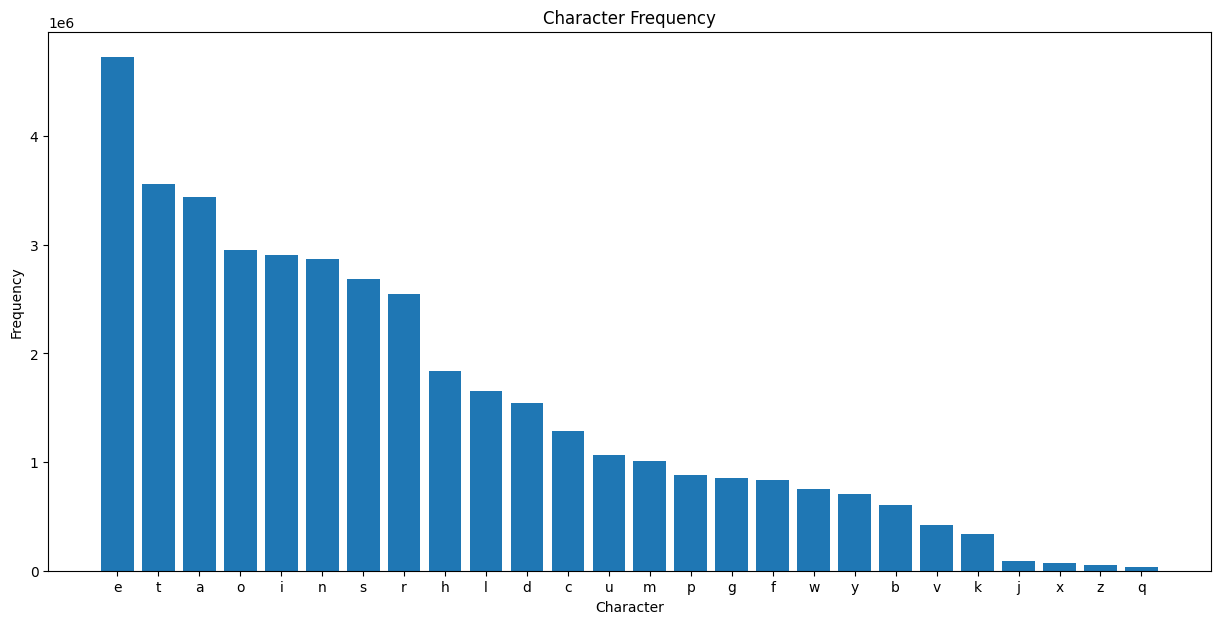

In [ ]:
import matplotlib.pyplot as plt

labels, values = zip(*sorted_count)

plt.figure(figsize=(15, 7))
plt.bar(labels, values)
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.title('Character Frequency')
plt.show()

### 2.9: Comparing Character Count between English and Indonesian

Kumpulkan juga character count untuk dataset bahasa Indonesia pada Bagian 1. Tampilkan kedua data tersebut dan bandingkan. Apa karakter yang paling dominan dalam bahasa Indonesia? Apa karakter yang paling dominan dalam bahasa Inggris?

In [ ]:
# Character-count for Indonesian
count_id = Counter()
for text in dataset_id['text']:
    count_id.update(count_characters_in_row(text))

# Mengurutkan hasil
sorted_count_id = sorted(count_id.items(), key=lambda x: x[1], reverse=True)

# Compare character count between English & Indonesian
print(f"5 Karakter paling dominan dalam bahasa Inggris: {sorted_count[:5]}")
print(f"5 Karakter paling dominan dalam bahasa Indonesia: {sorted_count_id[:5]}")

5 Karakter paling dominan dalam bahasa Inggris: [('e', 4724309), ('t', 3555737), ('a', 3435521), ('o', 2953428), ('i', 2907885)]
5 Karakter paling dominan dalam bahasa Indonesia: [('a', 353071), ('n', 189185), ('i', 159881), ('e', 154583), ('t', 103978)]


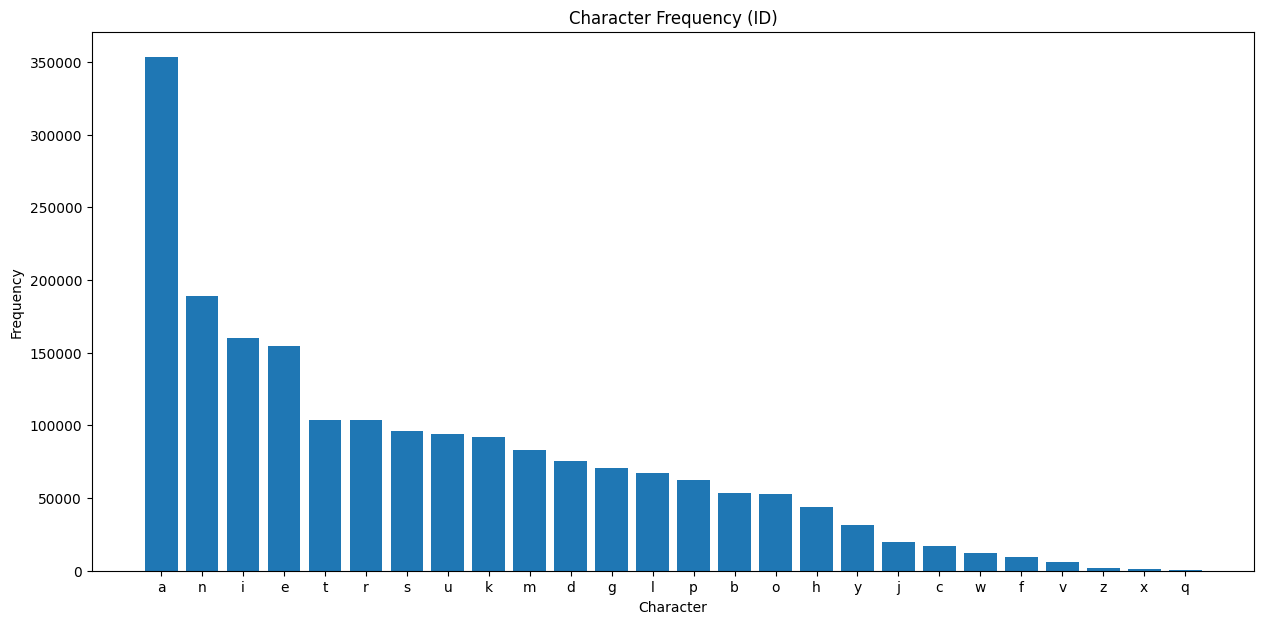

In [ ]:
labels, values = zip(*sorted_count_id)

plt.figure(figsize=(15, 7))
plt.bar(labels, values)
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.title('Character Frequency (ID)')
plt.show()

In [ ]:
end_time_en: int = time.time()
duration_sec_en: int = end_time_en - start_time_en
duration_min_en: float = round(duration_sec_en / 60, 2)
! date
print(f"Bagian 2: done in {duration_min_en} minutes")

Wed Sep 13 04:11:51 AM UTC 2023
Bagian 2: done in 22.41 minutes


Demikian tugas eksplorasi pemrograman 1. Untuk pengumpulan tugas, silahkan mengikuti petunjuk dalam dokumen soal.